### 중복데이터

In [6]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 확인

In [7]:
pd.set_option('display.max.colwidth',10)
df = pd.read_csv('./data/day4/bicycle_dup.csv', encoding= 'euc-kr')
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-1...,646,장한평역 1...,3.0,2019-1...,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-1...,646,장한평역 1...,2.0,2019-1...,3,중랑센터,2.0,7.0,1100.0,50
2,SPB-21097,2019-1...,646,장한평역 1...,1.0,2019-1...,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-1...,646,장한평역 1...,1.0,2019-1...,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-1...,512,뚝섬역 1번...,11.0,2019-1...,3,중랑센터,7.0,10.0,1650.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-1...,112,극동방송국 앞,5.0,2019-1...,101,(구)합정동...,1.0,11.0,2200.0,22
416,SPB-17768,2019-1...,103,망원역 2번...,14.0,2019-1...,101,(구)합정동...,NaN,5.0,NaN,22
417,SPB-18841,2019-1...,113,홍대입구역 ...,24.0,2019-1...,101,(구)합정동...,1.0,12.0,2280.0,37
418,SPB-24467,2019-1...,152,마포구민체육...,18.0,2019-1...,101,(구)합정동...,1.0,10.0,1180.0,27


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [9]:
df.describe()

,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,420.00...,396.00...,420.00...,409.00...,405.00...,404.00...,420.00...
mean,243.25...,7.585859,93.338095,2.843521,21.185185,2683.4...,35.492857
std,301.14...,6.258985,26.270667,1.699182,20.200058,3025.8...,31.829010
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.00...,3.000000,101.00...,1.000000,7.000000,1070.0...,24.000000
50%,117.50...,6.000000,101.00...,2.000000,14.000000,1680.0...,29.000000
75%,226.50...,10.000000,101.00...,4.000000,27.000000,3757.5...,40.000000
max,3102.0...,30.000000,101.00...,7.000000,122.00...,42070....,533.00...


In [10]:
df_temp = df.copy()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [11]:
df_temp['대여거치대'].fillna(df_temp['대여거치대'].mean(),inplace=True)
df_temp['반납거치대'].fillna(df_temp['반납거치대'].mean(),inplace=True)
df_temp['이용시간'].fillna(df_temp['이용시간'].mean(),inplace=True)
df_temp['이용거리'].fillna(df_temp['이용거리'].mean(),inplace=True)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    420 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    420 non-null    float64
 9   이용시간     420 non-null    float64
 10  이용거리     420 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [12]:
df_temp.describe()
df_final = df_temp[(df_temp['나이'] <= 100)& (df_temp['이용거리'] <= 20000)]
df_final.info()
df_final.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    415 non-null    object 
 1   대여일시     415 non-null    object 
 2   대여소번호    415 non-null    int64  
 3   대여소명     415 non-null    object 
 4   대여거치대    415 non-null    float64
 5   반납일시     415 non-null    object 
 6   반납대여소번호  415 non-null    int64  
 7   반납대여소명   415 non-null    object 
 8   반납거치대    415 non-null    float64
 9   이용시간     415 non-null    float64
 10  이용거리     415 non-null    float64
 11  나이       415 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 42.1+ KB


,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,415.00...,415.00...,415.00...,415.00...,415.00...,415.00...,415.00...
mean,243.17...,7.619423,93.713253,2.829587,21.235163,2601.5...,32.992771
std,302.32...,6.094665,25.677904,1.668997,19.873667,2266.1...,11.214313
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.00...,3.000000,101.00...,1.000000,8.000000,1080.0...,24.000000
50%,119.00...,6.000000,101.00...,2.843521,15.000000,1770.0...,29.000000
75%,226.00...,10.000000,101.00...,4.000000,27.000000,3555.0...,40.000000
max,3102.0...,30.000000,101.00...,7.000000,122.00...,17060....,69.000000


In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

In [28]:
sns.reset_defaults()
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')

<AxesSubplot:>

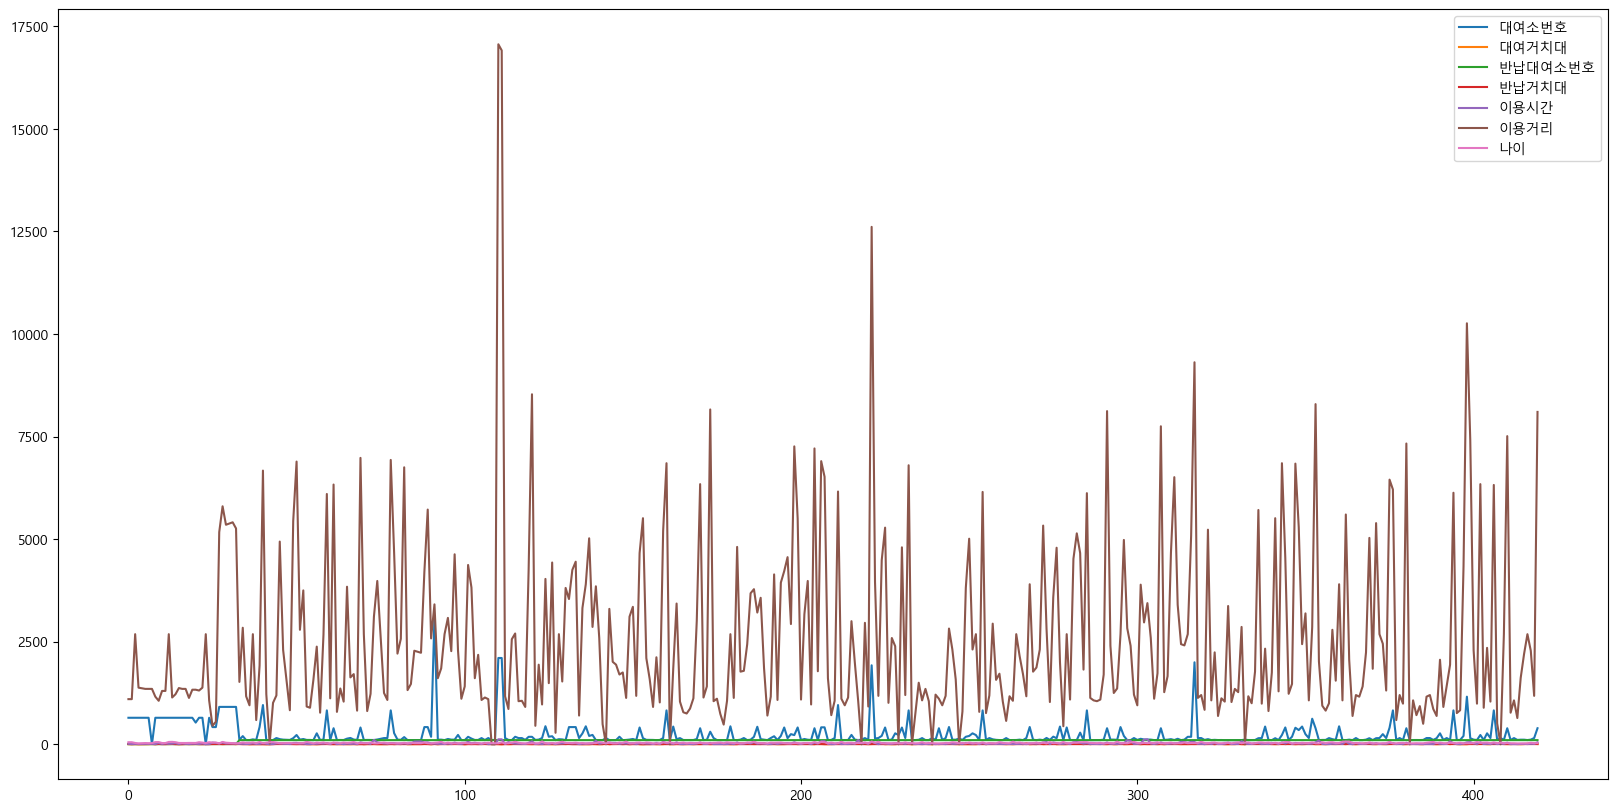

In [29]:
plt.rcParams['figure.figsize'] = (20,10)
df_final.plot()

In [16]:
import seaborn as sns

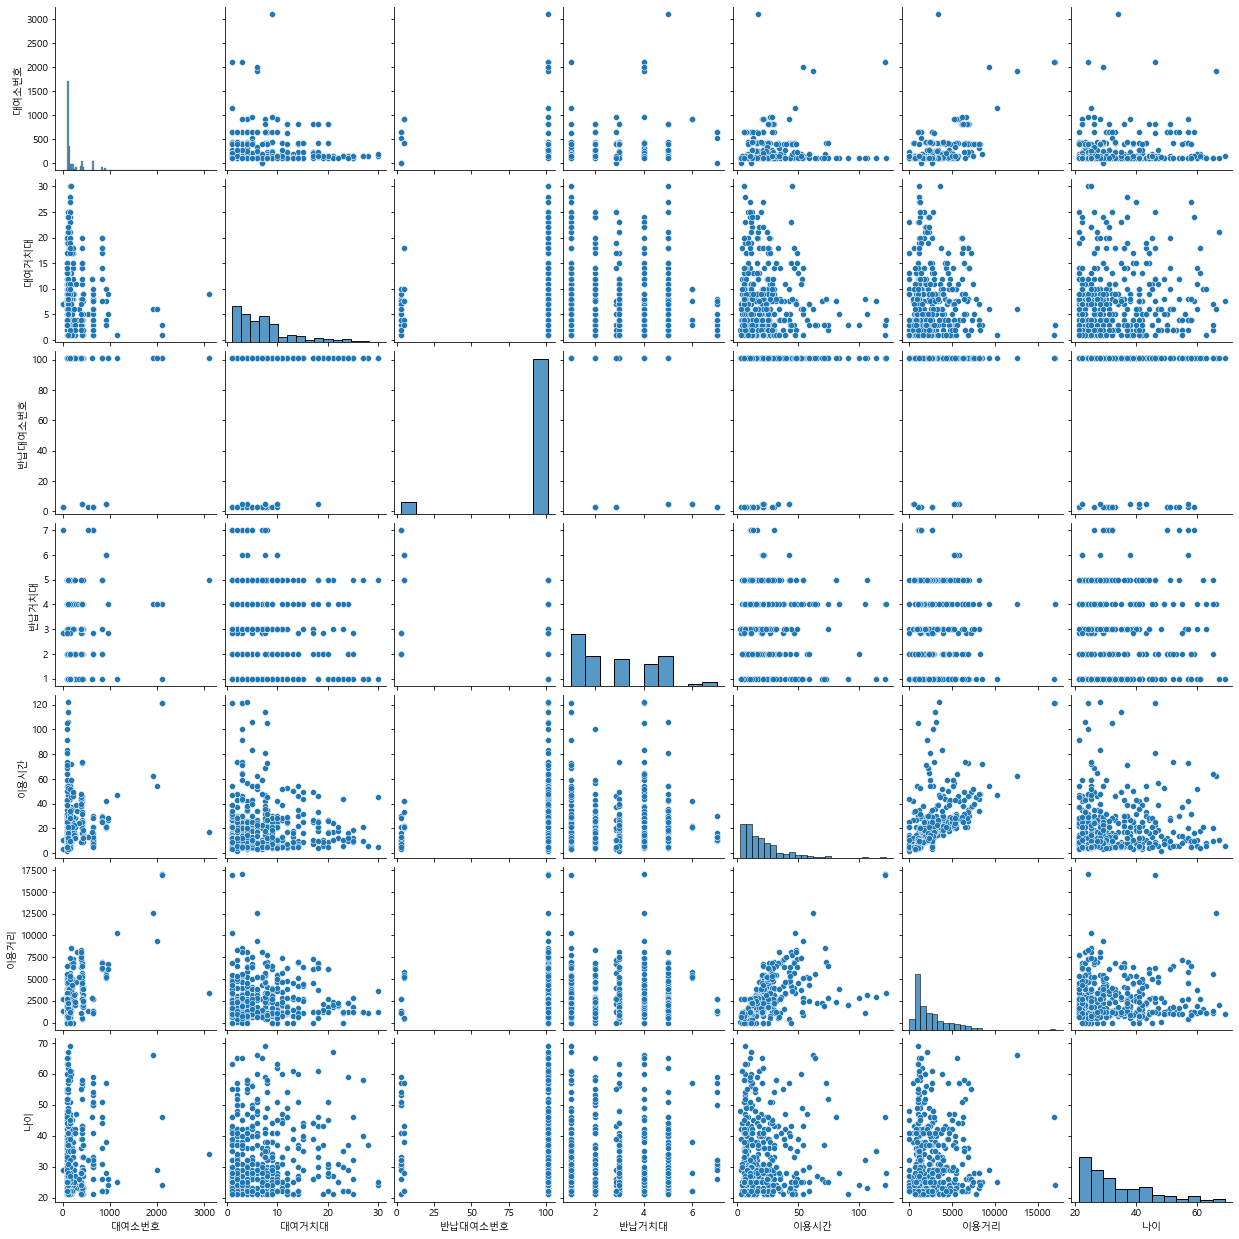

In [17]:
sns.pairplot(df_final)

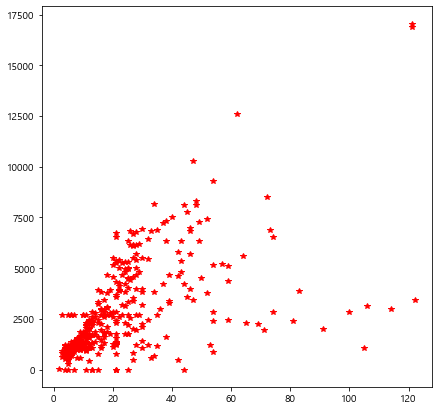

In [18]:
plt.figure(figsize=(7, 7))
plt.plot(df_final['이용시간'],df_final['이용거리'], 'r*')

### 중복체크

In [19]:
# 전체 중복체크
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
415    False
416    False
417    False
418    False
419    False
Length: 420, dtype: bool

In [20]:
# 컬럼별 중복체크
df['이용거리'].duplicated()

0      False
1       True
2      False
3      False
4      False
       ...  
415    False
416     True
417     True
418     True
419    False
Name: 이용거리, Length: 420, dtype: bool

In [21]:
# 여러개의 컬럼 중복체크
df.duplicated(['이용거리','나이'])
df[['이용거리','나이']].duplicated().value_counts()

False    405
True      15
dtype: int64

In [22]:
df.loc[df.duplicated(['이용거리','나이'])]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
1,SPB-16216,2019-1...,646,장한평역 1...,2.0,2019-1...,3,중랑센터,2.0,7.0,1100.0,50
11,SPB-20145,2019-1...,646,장한평역 1...,9.0,2019-1...,3,중랑센터,2.0,NaN,1300.0,30
17,SPB-02270,2019-1...,646,장한평역 1...,4.0,2019-1...,3,중랑센터,7.0,11.0,1350.0,31
20,SPB-21925,2019-1...,529,장한평역 8...,5.0,2019-1...,3,중랑센터,7.0,13.0,1330.0,32
210,SPB-19171,2019-1...,151,망원1동주민센터,NaN,2019-1...,101,(구)합정동...,5.0,5.0,1060.0,25
229,SPB-06190,2019-1...,226,샛강역 1번...,12.0,2019-1...,101,(구)합정동...,1.0,25.0,0.0,24
236,SPB-16119,2019-1...,151,망원1동주민센터,6.0,2019-1...,101,(구)합정동...,2.0,5.0,1070.0,51
238,SPB-06454,2019-1...,103,망원역 2번...,4.0,2019-1...,101,(구)합정동...,3.0,5.0,1050.0,32
267,SPB-16032,2019-1...,152,마포구민체육...,30.0,2019-1...,101,(구)합정동...,5.0,5.0,1170.0,24
268,SPB-22576,2019-1...,421,마포구청 앞,1.0,2019-1...,101,(구)합정동...,1.0,22.0,3900.0,21


In [23]:
df.duplicated(['이용거리'],keep='first') # keep 속성의 디폴트값(두번째 값을 중복으로 인식)
df.duplicated(['이용거리'],keep='last') # 마지막을 제외한 값 중복인식
df.duplicated(['이용거리'],keep=False) # 모든 중복값 인식

0       True
1       True
2       True
3       True
4      False
       ...  
415    False
416     True
417     True
418     True
419    False
Length: 420, dtype: bool

### 중복값 삭제

In [24]:
df.drop_duplicates(['이용거리'], keep='first')

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-1...,646,장한평역 1...,3.0,2019-1...,3,중랑센터,7.0,12.0,1100.0,50
2,SPB-21097,2019-1...,646,장한평역 1...,1.0,2019-1...,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-1...,646,장한평역 1...,1.0,2019-1...,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-1...,512,뚝섬역 1번...,11.0,2019-1...,3,중랑센터,7.0,10.0,1650.0,120
5,SPB-18401,2019-1...,646,장한평역 1...,1.0,2019-1...,3,중랑센터,7.0,11.0,1350.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
410,SPB-18614,2019-1...,391,정동길입구,5.0,2019-1...,101,(구)합정동...,3.0,40.0,7510.0,28
413,SPB-25161,2019-1...,106,합정역 7번...,6.0,2019-1...,101,(구)합정동...,1.0,3.0,640.0,21
414,SPB-24515,2019-1...,112,극동방송국 앞,1.0,2019-1...,101,(구)합정동...,1.0,9.0,1620.0,21
415,SPB-12116,2019-1...,112,극동방송국 앞,5.0,2019-1...,101,(구)합정동...,1.0,11.0,2200.0,22


In [25]:
df.drop_duplicates(['이용거리'], keep='last')

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-1...,512,뚝섬역 1번...,11.0,2019-1...,3,중랑센터,7.0,10.0,1650.0,120
11,SPB-20145,2019-1...,646,장한평역 1...,9.0,2019-1...,3,중랑센터,2.0,NaN,1300.0,30
15,SPB-13973,2019-1...,646,장한평역 1...,1.0,2019-1...,3,중랑센터,2.0,6.0,1370.0,32
20,SPB-21925,2019-1...,529,장한평역 8...,5.0,2019-1...,3,중랑센터,7.0,13.0,1330.0,32
22,SPB-05857,2019-1...,646,장한평역 1...,6.0,2019-1...,3,중랑센터,2.0,NaN,1380.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-1...,112,극동방송국 앞,5.0,2019-1...,101,(구)합정동...,1.0,11.0,2200.0,22
416,SPB-17768,2019-1...,103,망원역 2번...,14.0,2019-1...,101,(구)합정동...,NaN,5.0,NaN,22
417,SPB-18841,2019-1...,113,홍대입구역 ...,24.0,2019-1...,101,(구)합정동...,1.0,12.0,2280.0,37
418,SPB-24467,2019-1...,152,마포구민체육...,18.0,2019-1...,101,(구)합정동...,1.0,10.0,1180.0,27


In [26]:
df_dup = df.drop_duplicates(['이용거리'], keep=False)

In [27]:
df_dup[df_dup.duplicated(['이용거리'], keep=False)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
